# <center><font color = red>Anoop Mettu - Project 6 </font></center>
### <center>Title: Customer Segmentation - Credit Card Users </center>

- Name: Anoop Mettu
- Date: Oct 2021
- Project: Unsupervised Learning

### Context

AllLife Bank wants to focus on its credit card customer base in the next financial year to reach their targets

#### Info from marketing team
1. AllLife banks wants to run personalized campaigns to target new customers as well as upsell to existing customers
2. Customers perceive the support services of the back poorly. Hence the bank wants to improve service delivery

### Objective
1. Identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank
2. Provide recommendations to the bank on how to better market to and service these customers.


### Data description

#### Data dictionary

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

# Analytics (Python code)

### Basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Data

In [2]:
#Loading the dataset and creating a pandas data frame
df_original = pd.read_excel("Credit Card Customer Data.xlsx")

#Creating a copy to have original dataset accesible in case of any mistakes.
df = df_original.copy()

In [3]:
df.head() #Examining the data & columns

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


#### Random rows

- Picking __10 random rows__ of the data and checking entries to understand the data from each columns and verify consistency

In [4]:
df.sample(10) #'sample()' method returns a random selection of observations.

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
365,366,22348,13000,7,5,0,2
605,606,85234,36000,5,2,2,3
130,131,28701,18000,3,1,5,6
358,359,47866,9000,5,2,2,0
263,264,47496,14000,4,2,0,0
132,133,34103,12000,4,0,2,6
533,534,17377,36000,6,3,0,3
133,134,14248,10000,3,1,5,9
37,38,74126,17000,2,0,4,6
628,629,75009,84000,9,1,15,0


### 'info()' function

Understanding multiple aspects of each of the columns, including
1. Number of rows & columns. 
2. Data types
3. Number of non-null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


Notes:
- Number of Rows: 600
- Number of Columns: 6

Insights:
- All the columns are of type int. Hence the dataset is readily suitable for clustering algorithms. 
- The dataset seems to be free of any explicit null values
- Since the number of features(columns) is less, we also do not suffer from curse of dimensionality

## Checking for Unique values & Duplicates

In [6]:
df.nunique()  # using the 'nunique()' method to count the number of unique values in each of the columns

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

Insights:
- We can see that there are only 655 unique customer keys in 660 rows. 
- Since there are no null-values, there might be repeated customer keys

Next step:
- Examine more to detect repeated observations. In this case customer entries

In [7]:
df.duplicated().sum() # Extract the number of duplicated rows by using the 'duplicate()' along with the 'sum()' method.

0

This is slightly surprising. We see that there are only 655 unique customer keys but no duplicate rows. Hence there must be something else happening here.

Insights:
- Here we see that there are no fully duplicated rows. 
- Hence, let us attempt to see the duplicates based on 'customer key'

In [8]:
df[df.duplicated('Customer Key',keep=False)].sort_values('Customer Key') # Checking the duplicated customer keys and their entries

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


Insights:
- Here we can see that although customer key is repeated the rest of the entries differ. Hence let us discuss an approach to solve this.

Assumptions: 
1. We assume that there could have been an entry or user input error in the 'customer' key and assume that the duplicates belong to different customers and none of the other credentials seem common.
2. We are not interested in using customer key as a predictor variable for our analysis.

Based on these two assumptions, we can safely drop the 'customer key' column and treat the duplicates as unique customers. 

In [9]:
df.drop(['Sl_No','Customer Key'], axis=1, inplace=True) # dropping the columns inplace to directly make changes to the dataframe

In [10]:
df.head() #checking the new dataframe after dropping the columns

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


## Statistical summary of the columns

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


Insights:
- We can see that the average credit limit of the customers is around 34,000 with 4 to 5 credit cards per customer
- The average interactions of the customers in different modes are roughly the same in the range of 2 to 4

## Data visualization

Creating a pairplot to examine the relationship of the features with each other and to examine the distributions of each of the columsn

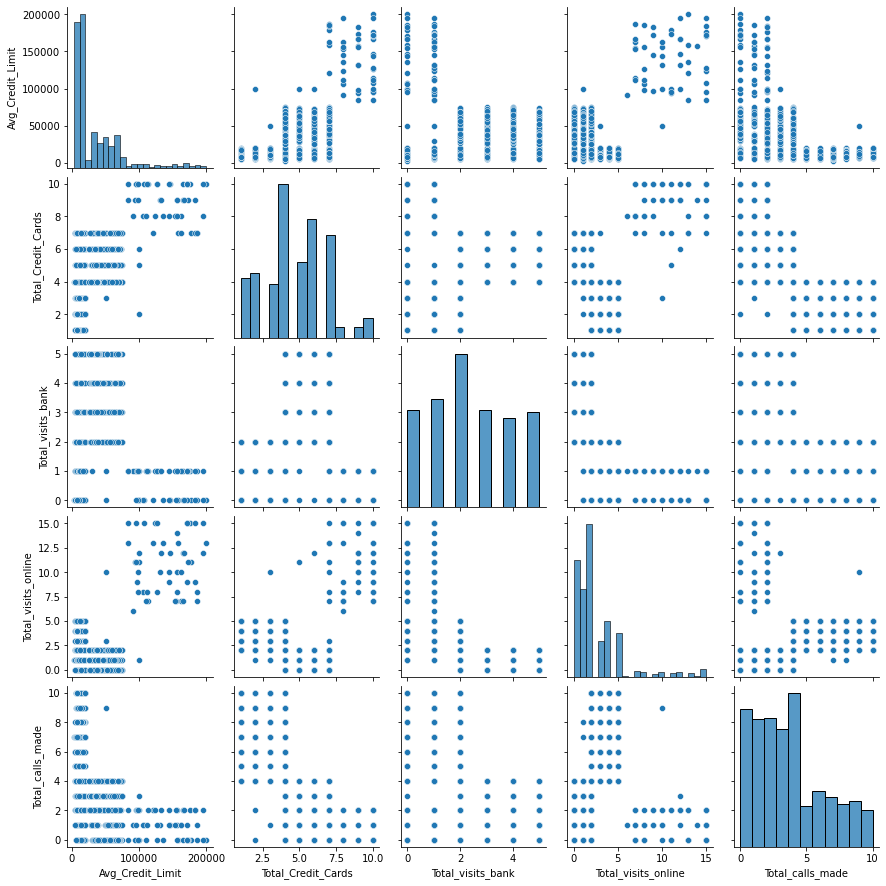

In [12]:
sns.pairplot(df); 

Insights:
- There don't seem to be any strong co-relations. Let us examine more with a heatmap
- The distributions of all the columns seem pretty normal, except the average credit limit, which seems to have a strong right skew

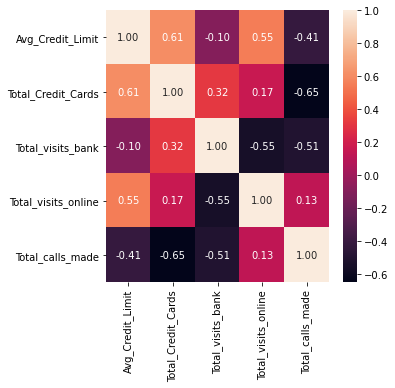

In [13]:
plt.subplots(figsize=(5,5))
sns.heatmap(df.corr(), annot=True, fmt="0.2f");

Notes:
- As noted from the pair plot, the heatmap confirms that there aren't any strong co-relations. 
- The strongest seems to be a 0.65 between the total calls made and the total number of credit cards.

# Outlier Detection & treatment

## Creating boxplots to examine outliers

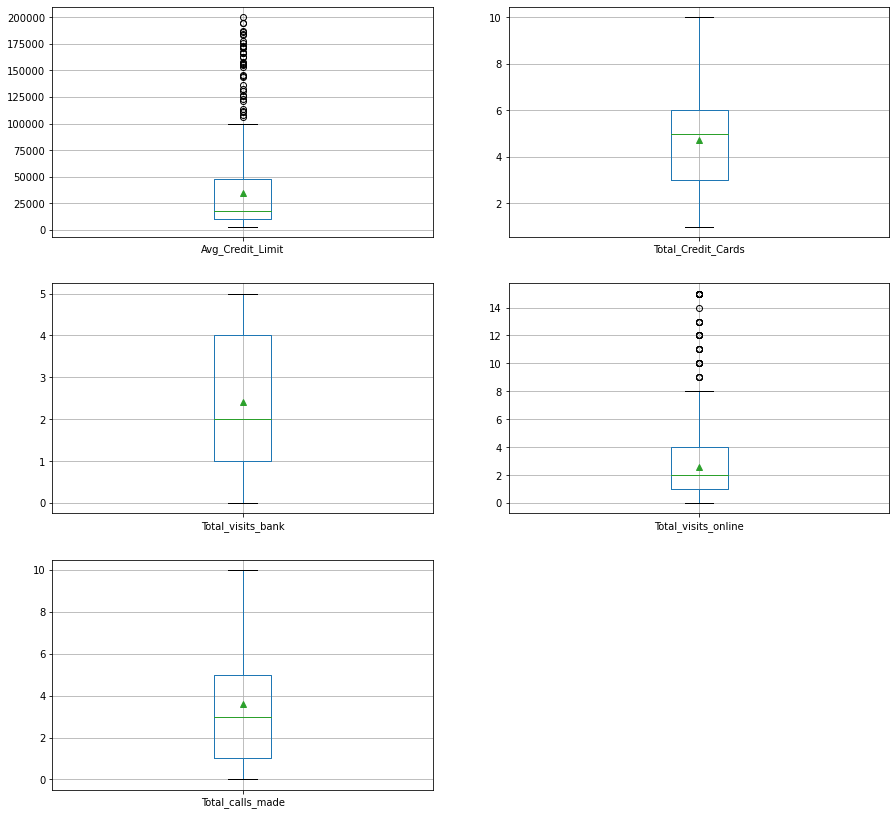

In [14]:
plt.figure(figsize=(15,50))
count=1
for i in df.columns:
    plt.subplot(10,2,count)
    df.boxplot([i], showmeans=True)
    count+=1

Insights:
- Average credit limit and total visits online seem to be the two columns with outliers
- Let us examine more using histograms

array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}>],
       [<AxesSubplot:title={'center':'Total_visits_bank'}>,
        <AxesSubplot:title={'center':'Total_visits_online'}>],
       [<AxesSubplot:title={'center':'Total_calls_made'}>,
        <AxesSubplot:>]], dtype=object)

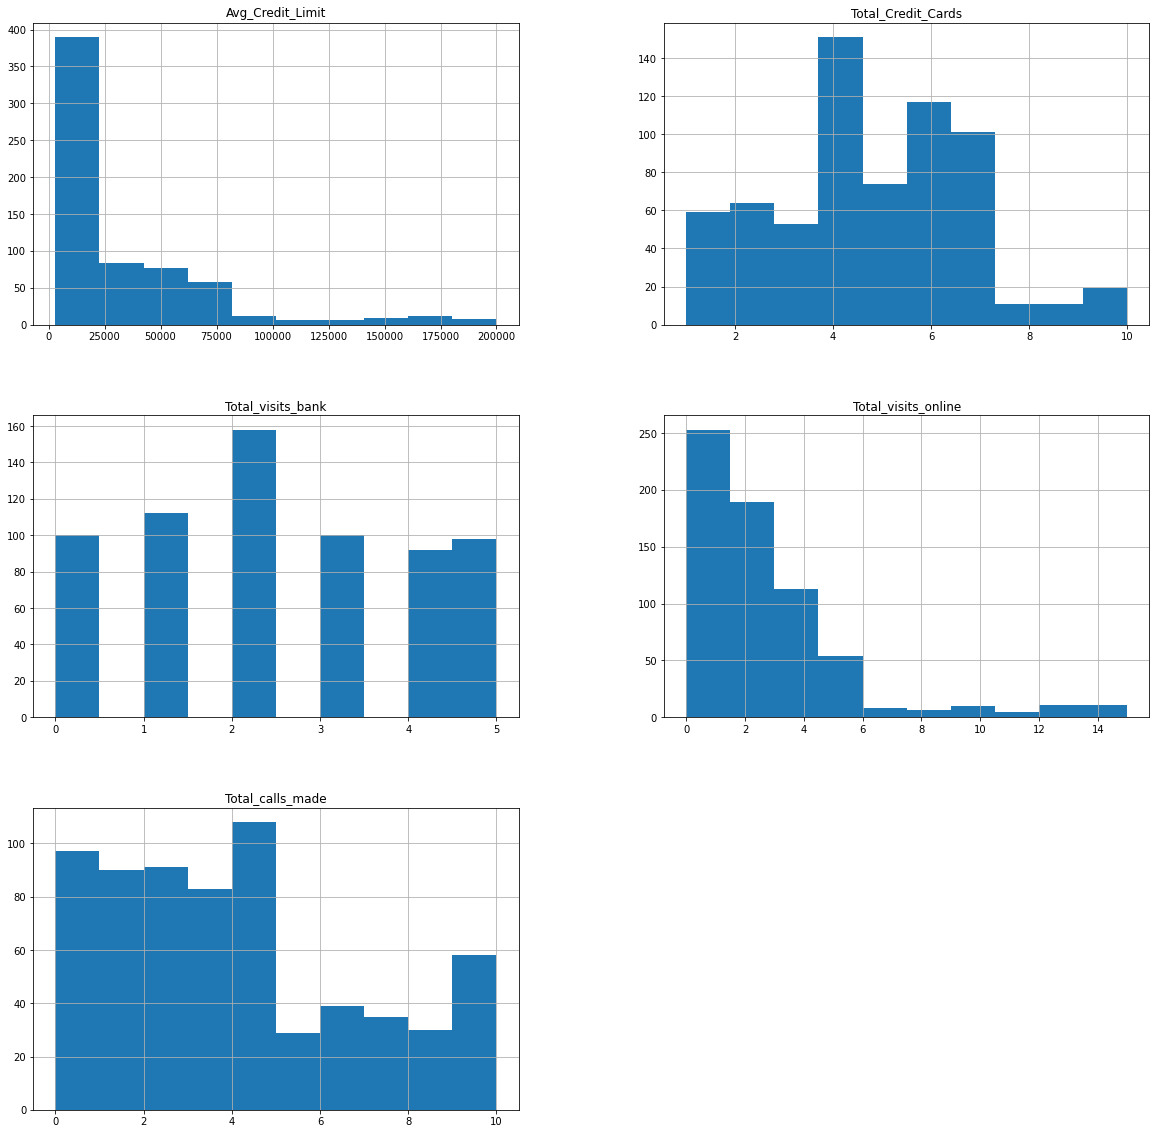

In [15]:
df.hist(figsize=(20,20))

Notes:
- As noted above Total calls made and average credit limit have a heavy right skew
- Using the 1.5 * IQR method, we can see that the outliers in the average credit limit seem more severe. Let us attempt to treat them

## Outlier treatment

It appears that there are quite a few outliers in the 'credit limit' column. Let us define the outlier range to be anything over than 2.5 times the IQR. Since the min value is 3000, it is well within the outlier range. Values greater than 150,000 are over the outlier range.

We will attempt to treat them by replacing the outlier values with the maximum of 150,000

In [16]:
# Writing to a user defined function to examine the outliers

def show_outliers(col,a,b):
    df1=df[df[col]<a]
    df2=df[df[col]>b]
    df1=df1.append(df2)
    return df1

In [17]:
show_outliers('Avg_Credit_Limit',0,150000)  # Examining the outliers beyond with average credit limit beyond 150k

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
612,157000,9,1,14,1
614,163000,8,1,7,1
619,158000,7,0,13,0
621,166000,9,1,12,2
622,176000,10,1,15,2
623,166000,10,0,7,0
624,178000,7,0,11,0
626,156000,9,1,10,2
629,155000,8,0,7,2
630,200000,10,0,13,0


Let us replace the average credit limit in these observations with the maximum in our acceptable range, which is 150k

In [18]:
df['Avg_Credit_Limit'].loc[df.Avg_Credit_Limit > 150000]  = 150000

Examining the new dataset with the outliers fixed. We can see that the 'max' in average credit limit column is now 150k

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,33768.181818,34699.523811,3000.0,10000.0,18000.0,48000.0,150000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


# Model building

Scaling the columns to remove the effect of different scales

In [20]:
from scipy.stats import zscore
df_scaled = df.apply(zscore)

In [21]:
df_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.910172,-1.249225,-0.860451,-0.547490,-1.251537
1,0.468137,-0.787585,-1.473731,2.520519,1.891859
2,0.468137,1.058973,-0.860451,0.134290,0.145528
3,-0.108677,0.135694,-0.860451,-0.547490,0.145528
4,1.910172,0.597334,-1.473731,3.202298,-0.203739


# K-means

Process:
1. Implementing K-means clustering
2. Creating and elbow curve and finding optimal no. of clusters
3. Building a k-means model with the optimal number of clusters

In [22]:
# Importing the necessary libraries
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

In [23]:
#implementing k-means with a range of clusters 

cluster_range = range(2,10) #creating a range to test the number of clusters 
 
#initiating an empty list to store the average distortions of for k. We shall use this to create the elbow cure
avg_distortion = []

# initialising an empty list to store the silhouette score for each model to create a graph
sil_score = []

for k in cluster_range:
    
    #Creating a k-means model
    model=KMeans(n_clusters=k)
    model.fit(df_scaled)
    prediction=model.predict(df_scaled)
    
    #Calculating average distortion
    avg_distortion.append(sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])
    
    #calculating silhouette score
    sil_score.append(silhouette_score(df_scaled, prediction))
    
print("Distortions:",avg_distortion) # showing the appended average distrotions list
print("\nSilhouette scores:",sil_score) # printing the silhouette scores of each model

Distortions: [1.4654623716245745, 1.1519770541105538, 1.0534375721663272, 0.9979003192860818, 0.9418663915460583, 0.9055983795031669, 0.8847720884172409, 0.8599634406355032]

Silhouette scores: [0.4173114869610717, 0.5147038363304676, 0.35510003465737067, 0.26993953587561414, 0.260605266091825, 0.25656858901273577, 0.2358444284632178, 0.2324633632558945]


## Elbow curve

Text(0, 0.5, 'Average distortion')

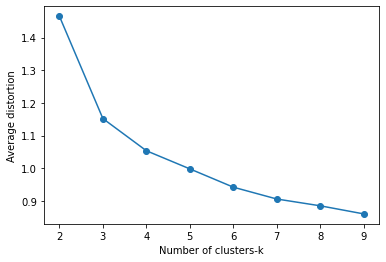

In [24]:
# Plotting the elbow curve and examining the optimal clusters
plt.plot(cluster_range, avg_distortion, marker='o')
plt.xlabel('Number of clusters-k')
plt.ylabel('Average distortion')

### Insights:
- From the elbow curve we see that there is not an extremly clear eblow. 
- However at cluster 3 there is a good shift and also at cluster 4 and 6.
- Let us examine more with silhouette score

## Silhouette score graph

Text(0, 0.5, 'Silhouette score')

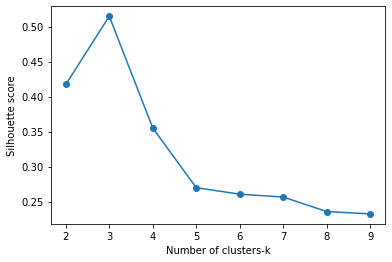

In [25]:
# Plotting the silhouette score and examining the optimal clusters
plt.plot(cluster_range, sil_score, marker='o')
plt.xlabel('Number of clusters-k')
plt.ylabel('Silhouette score')

### Insights:
1. From silhouette score and elbow curve combined we can see that 3 is the optimal number of clusters for this dataset
2. Let us create a k-means model with 3 clusters

### Model 1: Kmeans with 3 clusters

In [26]:
optimal = 3

#creating a k-means model with 3 optimal clusters
model_1 = KMeans(n_clusters=optimal)
model_1.fit(df_scaled)

KMeans(n_clusters=3)

### Model 1: Cluster profiles

In [27]:
df_model_1 = df.copy() #creating a copy of the original dataframe

In [28]:
df_model_1['Cluster_labels'] = model_1.labels_ #adding cluster labels to the dataframe

In [29]:
df_model_1.sample(10) #examining the dataframe

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster_labels
323,6000,4,2,2,2,1
621,150000,9,1,12,2,2
547,26000,4,5,2,4,1
470,37000,5,5,1,4,1
33,16000,1,0,5,6,0
90,13000,2,1,4,6,0
318,14000,6,4,0,3,1
296,11000,4,4,0,2,1
326,6000,4,4,2,3,1
34,8000,4,1,3,10,0


### Examing the typical profile of each cluster

In [30]:
model_1_profiles = df_model_1.groupby(['Cluster_labels']) #grouping the dataframe by clusters

In [31]:
model_1_profiles.mean() #examining the average profile of the clusters

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster_labels,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536
1,33782.383420,5.515544,3.489637,0.981865,2.000000
2,130400.000000,8.740000,0.600000,10.900000,1.080000


In [32]:
model_1_profiles.count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster_labels,,,,,
0,224,224,224,224,224
1,386,386,386,386,386
2,50,50,50,50,50


In [33]:
df.mean()

Avg_Credit_Limit       33768.181818
Total_Credit_Cards         4.706061
Total_visits_bank          2.403030
Total_visits_online        2.606061
Total_calls_made           3.583333
dtype: float64

## Insights - Model 1

Here we can see the typical profiles of the 3 clusters
- __Cluster 0:__ Average credit limit is nearly 34k, which was the average of the dataset to beging with. Their entire profile is similar to that of an average credit card customer of the bank, except for the online visits, which they seem to be quite low on. Let's name this segement __OLD IS GOLD Segment__
- __Cluster 1:__ They seem to have the lowest credit limit of the 3 clusters. Although they use online banking, they prefer phone calls over online. They do not like to go to the bank phyically and prefer to use lesser number of credit cards. Let's name this segment __MINIMALIST segment__
- __Cluster 2__: They are the heaviest users with highest credit limit, highest number of credit cards and heavily prefer online over any other mode of interaction. Let us name this segment the __PREMIUM DIGITAL segment__

# Hierarchical clustering

Process:
1. Creating Hierarchical clusters with different linkage methods
2. Compare the linkage methods and figuring out the optimal clusters
3. Creating a final model

Importing necessary libraries

In [34]:
# To perform hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

# To compute cophenetic correlation, and create dendrograms
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist

In [35]:
# list of different linkage methods
link_method = ["single", "complete", "average", "centroid", "ward", "weighted"]
scores_list = []

for link in link_method:
    model = linkage(df_scaled, metric="euclidean", method=link)
    c_score, coph_dists = cophenet(model, pdist(df_scaled))
    scores_list.append(c_score) 

### Plotting the scores of each method

Text(0, 0.5, 'Cophenet score')

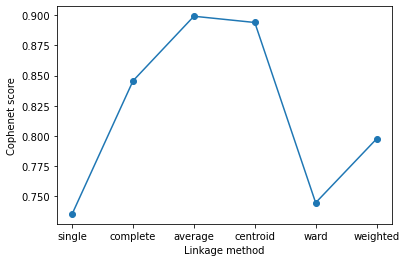

In [36]:
# Plotting the silhouette score and examining the optimal clusters
plt.plot(link_method, scores_list, marker='o')
plt.xlabel('Linkage method')
plt.ylabel('Cophenet score')

Notes:
- It appears that average and centroid methods have the highest cophenetic scores

## Dendrograms visualization

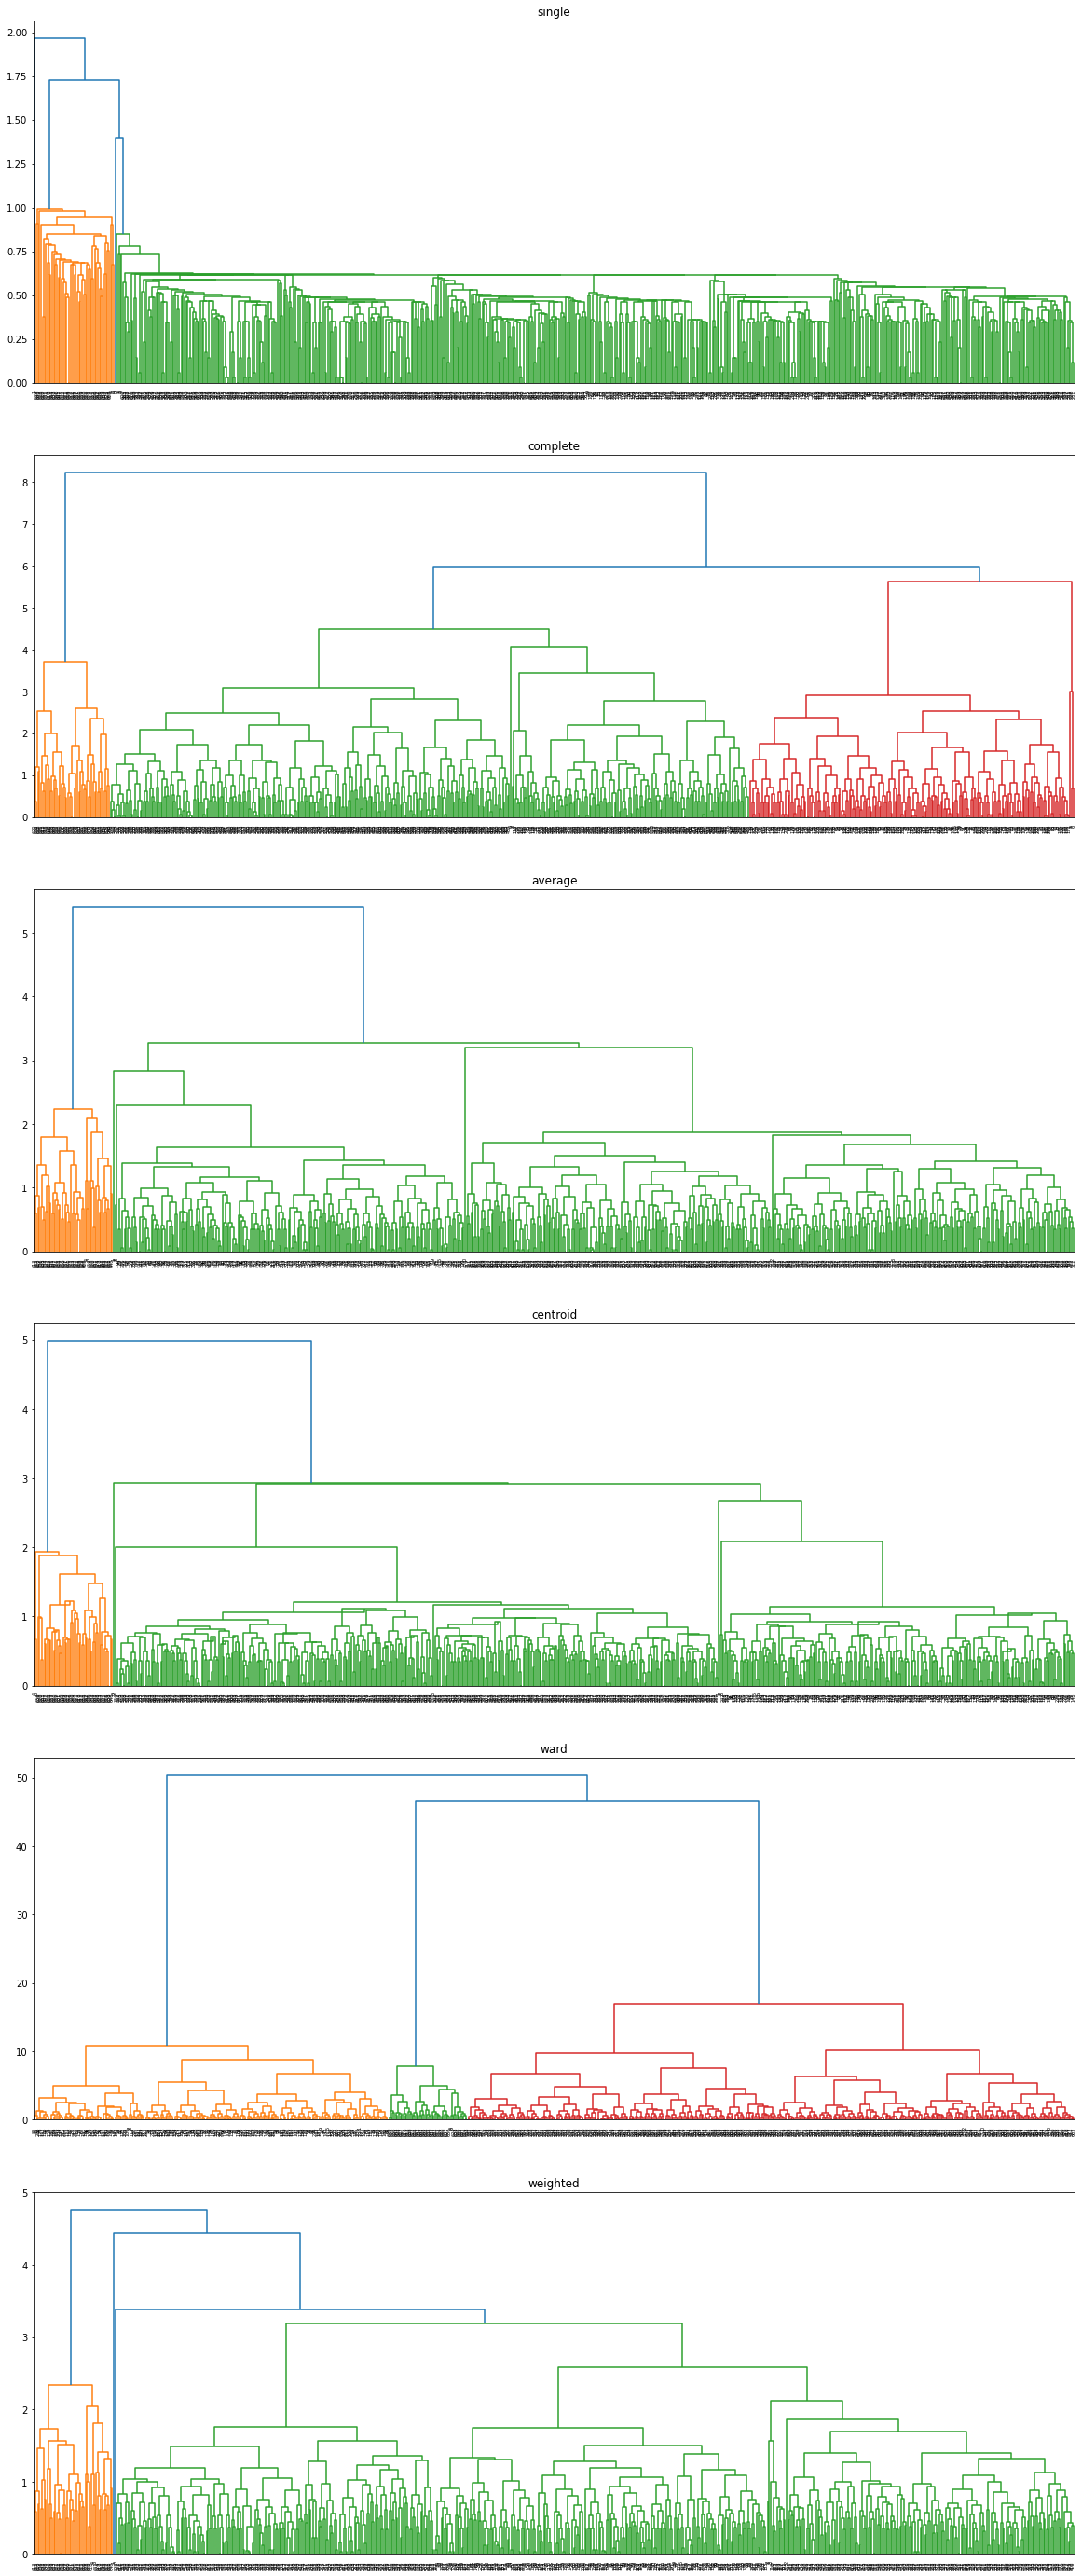

In [37]:
fig, axis = plt.subplots(len(link_method),1, figsize=(20, 50))

for i,link in enumerate(link_method):
    axis[i].set_title(link) #Setting the title for each graph
    model = linkage(df_scaled, metric="euclidean", method=link) #creating a clustering model
    dendrogram(model, ax=axis[i]) #visualizing the dendrograpms

Notes:
- Since cophenetic correlation score is highest for average linkage method we will use it for our analysis.
- From most of the the digrams including the 'average' linkage dendrogram, we can see that 3 seems to be a good number of clusters. 
- As soon as we start going for 4 or more  clusters, we tend to have atleast one cluster with really small number of observations in them.

## Model 2: Hierarchical with optimal clusters

In [38]:
# importing necessary libraries
from sklearn.cluster import AgglomerativeClustering 

In [39]:
# building the final hierarchical model

optimal_clusters = 3
optimal_linkage = 'average'

model_2 = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean',  linkage=optimal_linkage)
model_2.fit(df_scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

### Model 2: Cluster profiles

In [40]:
df_model_2 = df.copy() #creating a copy of the original dataframe

In [41]:
df_model_2['Cluster_labels'] = model_2.labels_ #adding cluster labels to the dataframe

In [42]:
df_model_2.sample(10) #examining the dataframe

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster_labels
568,58000,6,5,1,0,0
74,7000,2,0,5,8,2
295,10000,6,4,2,3,0
359,8000,4,2,0,2,0
16,15000,2,1,2,4,2
546,68000,7,2,1,4,0
233,13000,7,2,1,0,0
39,10000,2,2,4,9,2
292,17000,4,3,0,4,0
146,13000,2,1,3,9,2


### Examing the typical profile of each cluster

In [43]:
model_2_profiles = df_model_2.groupby(['Cluster_labels']) #grouping the dataframe by clusters

In [44]:
model_2_profiles.mean() #examining the average profile of the clusters

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster_labels,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168
1,130400.000000,8.740000,0.600000,10.900000,1.080000
2,12197.309417,2.403587,0.928251,3.560538,6.883408


In [45]:
model_2_profiles.count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster_labels,,,,,
0,387,387,387,387,387
1,50,50,50,50,50
2,223,223,223,223,223


__Insights:__

- Here in model the althought the clusters are acutally the same, their ordering is slightly changed, which is NOT a concern. 
- In model 2, 
    - Cluster 0 is the same old is gold segment
    - Cluster 1 is Premium digital
    - Cluster 2 is minialist.
- Nonetheless, the counts of number of customers in each segment is relatively stable in both models.

## Model 2 & Model 1 comparision

Unsuprisingly, both the algorithms give similar clusters with the same 3 segements, with same number of customers in each segment

- __OLD IS GOLD__ (380 customers)
- __MINIMALIST__ (220 custoomers)
- __PREMIUM DIGITAL__ (50 customers)

# Recomendations

Going over the data set and the clusters here are our top recomendations for AllLife Banks.

- There are clear & distinctive segements of people present in their customer base.
- We have identified 3 clusters and named them according to their characterstics
- We recommend using a different marking and service approach to each of these segments.

Let us look at each segment and identify the marketing and service goals for each:

1. __Old Is Gold Segment:__ These customers typically are the general average users with a healthy credit limit around 34,000 with average of 4 to 5 credit cards. They prefer to visit the bank for their needs and sometimes may communicate through phones.
    - _Marketing recommendation:_ Since they are moderate users we can identify their specific needs and keep in mind their spending expectations to design marketing campaigns specially for them. 
    - _Service recommendation:_ Sincey they prefer to visit the bank, we might create special on-site service desks to ease their process. The chanel to reach them would not be online but perhaps phone calls of phyical mailers either in bank or to home.

2. __Minimalist Segment:__ These customers are very light users and prefer to communicate via phone. 
    - _Marketing recommendation:_ Since their spending habits are quite small, we need to identify the reasons behind it and create programs to help their current spending or future spending.
    - _Service recommendation:_ Since these customers prefer phone communications, creating special phone support services would be extremely beneficial for them
    
3. __Premium Digial Segment:__ These are our heavy users with the greatest online presence.
    - _Marketing recommendations:_ There is perhaps a very wide range of products and services that could fit these customers apetite. Hence understanding their likes and indulgences would give us a head start in terms of what to market for them. Online ad commercials would also be a great way to reach them.
    -_Service recommendation:_ This segment has the highest online presence, creating easy to navigate websites and phone apps, to easily solve their problems and fullfil their needs & requests will likely improve our service experience for these customers